In [2]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=512, validation_split=0.4)

Epoch 1/50
71/71 [==============================] - 3s 23ms/step - loss: 1.4012 - accuracy: 0.5033 - val_loss: 0.7055 - val_accuracy: 0.7623
Epoch 2/50
71/71 [==============================] - 2s 28ms/step - loss: 0.8424 - accuracy: 0.7036 - val_loss: 0.5636 - val_accuracy: 0.8115
Epoch 3/50
71/71 [==============================] - 1s 20ms/step - loss: 0.6923 - accuracy: 0.7558 - val_loss: 0.4997 - val_accuracy: 0.8251
Epoch 4/50
71/71 [==============================] - 1s 16ms/step - loss: 0.6304 - accuracy: 0.7814 - val_loss: 0.4670 - val_accuracy: 0.8360
Epoch 5/50
71/71 [==============================] - 1s 17ms/step - loss: 0.5798 - accuracy: 0.7988 - val_loss: 0.4412 - val_accuracy: 0.8451
Epoch 6/50
71/71 [==============================] - 1s 15ms/step - loss: 0.5487 - accuracy: 0.8105 - val_loss: 0.4261 - val_accuracy: 0.8485
Epoch 7/50
71/71 [==============================] - 1s 16ms/step - loss: 0.5249 - accuracy: 0.8189 - val_loss: 0.4200 - val_accuracy: 0.8511
Epoch 8/50
71

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.8761
Test accuracy: 0.8761000037193298


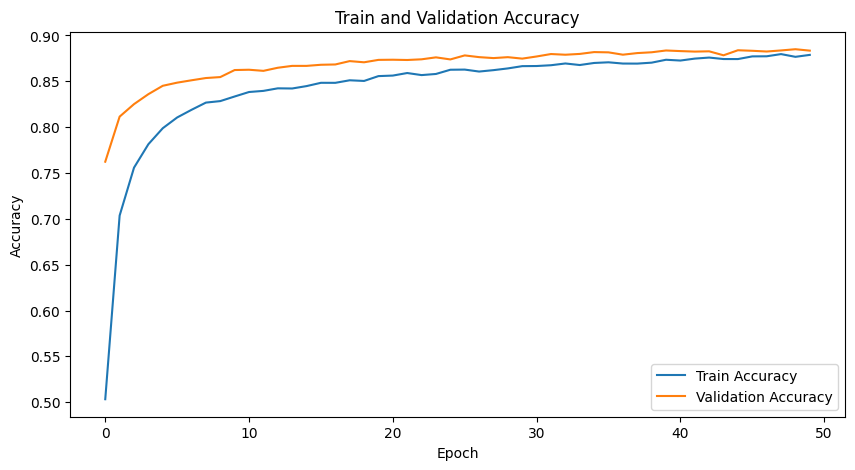

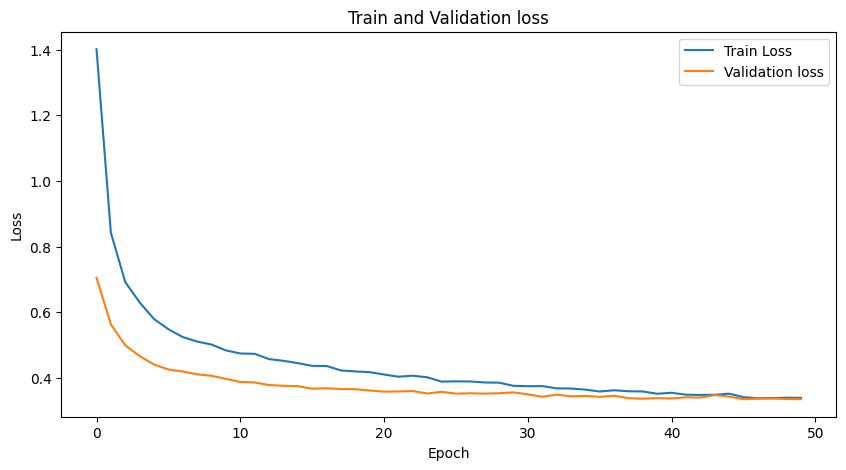

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Train and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()